In [1]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# yfinance will be used for importing historical oil prices from yahoo finance
import yfinance as yf
#Date will be set to create start and end dates for prices
from datetime import date

In [2]:
start='2000-01-01'
end=date.today()

# Importing our data
data = yf.download('BZ=F',start,end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387


<AxesSubplot:xlabel='Date', ylabel='Crude Oil Prices: Brent - Europe'>

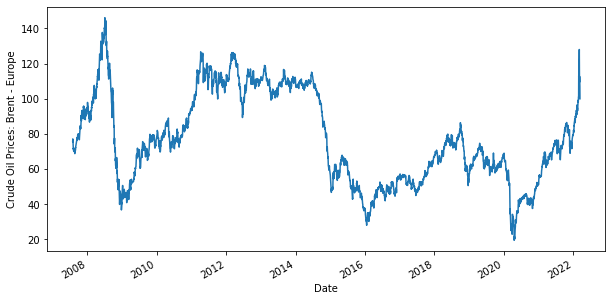

In [3]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Close.plot(figsize=(10,5))

In [4]:
data['MA3'] = data['Close'].shift(1).rolling(window=3).mean()
data['MA9']= data['Close'].shift(1).rolling(window=9).mean()

# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
Date,,
2007-08-10,71.000000,73.646667
2007-08-13,70.529999,73.052222
2007-08-14,70.276667,72.294445
2007-08-15,70.376668,71.756667
2007-08-16,70.793335,71.298889


In [5]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

Date
2007-08-10    70.389999
2007-08-13    70.230003
2007-08-14    70.510002
2007-08-15    71.639999
2007-08-16    69.769997
Name: Close, dtype: float64

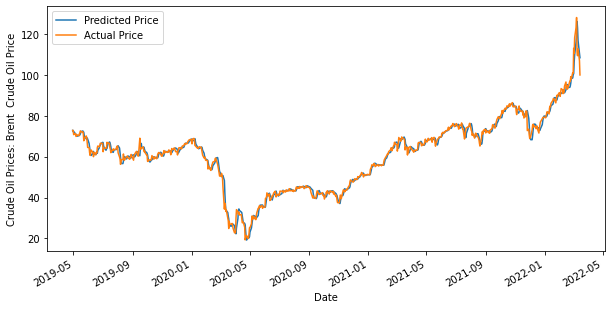

In [7]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent  Crude Oil Price")
plt.show()

In [8]:
# Rate Model Accuracy
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 98.51% accuracy.
